In [1]:
%ls datasets

adult.csv                  census.csv     nhanes_2015_2016.csv
airline_data.csv           coches.csv     pokemon.csv
antropometria00.csv        cwurData.csv   reg_data.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          mic.xlsx
CasosCovid.xlsx            movies.csv


In [2]:
import pandas as pd

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel('datasets/mic2.xlsx',
                  engine = 'openpyxl')
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [6]:
def custom_cls(x):
    if (0<= x <= 20):
        return '<=20' 
    elif(21 <= x <= 30):
        return '21 - 30'
    elif(31 <= x <= 40):
        return '31 - 40'
    else:
        return '>= 40'

In [7]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']), axis = 1)
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21 - 30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>= 40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21 - 30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21 - 30


In [8]:
counts = df['AgeGP'].value_counts()
counts = counts.to_frame()
type(counts)

pandas.core.frame.DataFrame

In [9]:
counts['%'] = (counts.iloc[:, :]/counts.loc[:, 'AgeGP'].sum(axis=0))*100
counts 

,AgeGP,%
21 - 30,31,62.0
<=20,11,22.0
31 - 40,5,10.0
>= 40,3,6.0


In [13]:
counts = counts.reindex(['<=20', '21 - 30', '31 - 40', '>= 40'])
counts = counts.reset_index()
counts

,index,Age,%
0,<=20,11,22.0
1,21 - 30,31,62.0
2,31 - 40,5,10.0
3,>= 40,3,6.0


In [14]:
counts = counts.rename({'index': 'Age_Group', 'AgeGP': 'Age'},
                       axis = 1)
counts

,Age_Group,Age,%
0,<=20,11,22.0
1,21 - 30,31,62.0
2,31 - 40,5,10.0
3,>= 40,3,6.0


In [51]:
import matplotlib.pyplot as plt

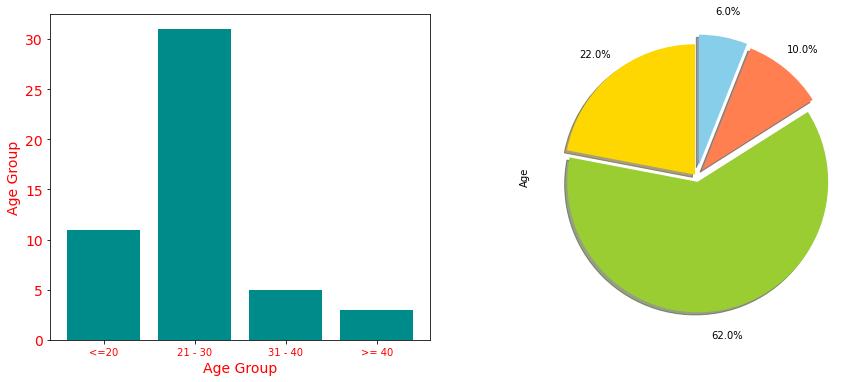

In [57]:
x = list(counts['Age_Group'])
y = list(counts['Age'])

plt.subplot(1, 2, 1)
plt.rcParams["figure.figsize"] = (10, 7)
plt.bar(x, y, width = 0.8, color = 'darkcyan')

plt.xlabel('Age Group', fontweight = 'regular', color = 'red', fontsize = 14,
           horizontalalignment = 'center')
plt.ylabel('Age Group', fontweight = 'regular', color = 'red', fontsize = 14,
           horizontalalignment = 'center')
plt.xticks(fontsize = 10, color = 'red')
plt.yticks(fontsize = 14, color = 'red')

plt.subplot(1, 2, 2)
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'pink']
explode_list = [0.02, 0.04, 0.07, 0.09]
counts['Age'].plot(kind = 'pie',
                   figsize = (15, 6),
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.2,
                   shadow = True,
                   startangle = 90,
                   colors = color_list,
                   explode = explode_list
                  )